In [5]:
import pandas as pd
from pandas import DataFrame
from scipy.stats import zscore
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from matplotlib import pyplot
from itertools import combinations
from pandas import DataFrame
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [6]:
# Definitions used
def get_dataset():
    df = pd.read_excel('new_df_66.xlsx', engine='openpyxl')
    new_df_1 = df.drop(['ile', 'ile_st', 'trp', 'trp_st', 'h_pi', 'X.w'], axis=1)
    X = new_df_1.drop(['DELTA30'], axis=1)
    Y = new_df_1['DELTA30']
    return X, Y

def get_models():
    models = dict()
    for d in range(1,4):
        trans = PolynomialFeatures(degree=d)
        model = xgb.XGBRegressor(verbosity=0)
        models[str(d)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models

def evaluate_model(model, X, Y):
    kfold = KFold(n_splits=num_instances, random_state=seed)
    n_scores = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    return n_scores

# Use PolynomialFeatures in sklearn.preprocessing to create two-way interactions for all features
def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]

    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames

    # Remove interaction terms with all 0 values
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)

    return df


In [7]:
#Removing empty columns and splitting X and Y from the rest of the dataset
df = pd.read_excel('new_df_66.xlsx', engine='openpyxl')
new_df_1 = df.drop(['ile', 'ile_st', 'trp', 'trp_st', 'h_pi', 'X.w', 'MSWHIM3.1','DELTA30', 'PP2.1'], axis=1)
new_df_1.shape

(312, 186)

In [8]:
new_df_1 = new_df_1.iloc[:, range(0,78)]
#new_df_1 = new_df_1.drop(new_df_1.iloc[:,range(0,78)],axis=1, inplace=True)
new_df_1

pock_volume  pock_volume_st  pock_asa  pock_asa_st  pock_pol_asa  \
0        459.698         130.508   302.045       77.975       180.836   
1        418.535         131.867   254.190       76.348       140.337   
2        400.662         177.172   248.044      102.666       134.110   
3        469.467         141.530   287.770       83.270       154.889   
4        537.222         145.912   348.785       81.202       203.730   
..           ...             ...       ...          ...           ...   
307      308.343         130.871   189.033       85.281       124.919   
308      374.055         141.549   234.792       86.197       123.280   
309      415.336         149.708   266.507       88.030       157.731   
310      385.228         137.620   239.307       80.725       145.513   
311      433.560         144.717   278.684       83.808       150.881   

     pock_pol_asa_st  pock_apol_asa  pock_apol_asa_st  pock_asa22  \
0             48.255        121.209            41.700     148.374   
1             47.094        113.854            35.955     139.001   
2             61.556        113.934            48.821     140.898   
3             46.392        132.882            45.818     165.684   
4             52.352        145.056            40.470     176.371   
..               ...            ...               ...         ...   
307           61.444         64.115            32.219     127.675   
308           49.352        111.513            42.612     117.844   
309           52.201        108.776            45.382     146.853   
310           53.211         93.793            36.375     125.799   
311           48.168        127.804            43.762     145.217   

     pock_asa22_st  ...    pro  pro_st    ser  ser_st    thr  thr_st    tyr  \
0           52.668  ...  0.000   0.000  2.940   0.278  0.947   0.226  0.662   
1           49.465  ...  0.001   0.032  3.056   0.447  0.920   0.427  0.654   
2           61.915  ...  0.041   0.198  2.188   1.048  0.557   0.497  1.024   
3           56.258  ...  0.002   0.045  2.948   0.283  0.866   0.342  1.059   
4           53.953  ...  0.077   0.267  2.947   0.277  0.125   0.331  1.989   
..             ...  ...    ...     ...    ...     ...    ...     ...    ...   
307         62.318  ...  0.000   0.000  2.826   0.514  0.501   0.500  0.395   
308         51.838  ...  0.010   0.099  2.882   0.361  0.873   0.334  0.808   
309         54.269  ...  0.012   0.109  2.791   0.491  0.955   0.209  0.959   
310         54.265  ...  0.000   0.000  2.909   0.299  0.976   0.156  0.587   
311         54.600  ...  0.004   0.063  2.754   0.530  0.714   0.452  1.112   

     tyr_st    val  val_st  
0     0.759  0.447   0.540  
1     0.838  0.389   0.490  
2     1.015  0.593   0.525  
3     0.763  0.313   0.464  
4     1.171  1.235   0.714  
..      ...    ...     ...  
307   0.721  0.412   0.492  
308   0.932  0.142   0.349  
309   0.930  0.193   0.395  
310   0.851  0.590   0.575  
311   0.859  0.249   0.433  

[312 rows x 78 columns]

In [9]:
new_df_1

pock_volume  pock_volume_st  pock_asa  pock_asa_st  pock_pol_asa  \
0        459.698         130.508   302.045       77.975       180.836   
1        418.535         131.867   254.190       76.348       140.337   
2        400.662         177.172   248.044      102.666       134.110   
3        469.467         141.530   287.770       83.270       154.889   
4        537.222         145.912   348.785       81.202       203.730   
..           ...             ...       ...          ...           ...   
307      308.343         130.871   189.033       85.281       124.919   
308      374.055         141.549   234.792       86.197       123.280   
309      415.336         149.708   266.507       88.030       157.731   
310      385.228         137.620   239.307       80.725       145.513   
311      433.560         144.717   278.684       83.808       150.881   

     pock_pol_asa_st  pock_apol_asa  pock_apol_asa_st  pock_asa22  \
0             48.255        121.209            41.700     148.374   
1             47.094        113.854            35.955     139.001   
2             61.556        113.934            48.821     140.898   
3             46.392        132.882            45.818     165.684   
4             52.352        145.056            40.470     176.371   
..               ...            ...               ...         ...   
307           61.444         64.115            32.219     127.675   
308           49.352        111.513            42.612     117.844   
309           52.201        108.776            45.382     146.853   
310           53.211         93.793            36.375     125.799   
311           48.168        127.804            43.762     145.217   

     pock_asa22_st  ...    pro  pro_st    ser  ser_st    thr  thr_st    tyr  \
0           52.668  ...  0.000   0.000  2.940   0.278  0.947   0.226  0.662   
1           49.465  ...  0.001   0.032  3.056   0.447  0.920   0.427  0.654   
2           61.915  ...  0.041   0.198  2.188   1.048  0.557   0.497  1.024   
3           56.258  ...  0.002   0.045  2.948   0.283  0.866   0.342  1.059   
4           53.953  ...  0.077   0.267  2.947   0.277  0.125   0.331  1.989   
..             ...  ...    ...     ...    ...     ...    ...     ...    ...   
307         62.318  ...  0.000   0.000  2.826   0.514  0.501   0.500  0.395   
308         51.838  ...  0.010   0.099  2.882   0.361  0.873   0.334  0.808   
309         54.269  ...  0.012   0.109  2.791   0.491  0.955   0.209  0.959   
310         54.265  ...  0.000   0.000  2.909   0.299  0.976   0.156  0.587   
311         54.600  ...  0.004   0.063  2.754   0.530  0.714   0.452  1.112   

     tyr_st    val  val_st  
0     0.759  0.447   0.540  
1     0.838  0.389   0.490  
2     1.015  0.593   0.525  
3     0.763  0.313   0.464  
4     1.171  1.235   0.714  
..      ...    ...     ...  
307   0.721  0.412   0.492  
308   0.932  0.142   0.349  
309   0.930  0.193   0.395  
310   0.851  0.590   0.575  
311   0.859  0.249   0.433  

[312 rows x 78 columns]

In [10]:
Y = df['DELTA30']

In [11]:
#% removing correlated features
correlated_features= set()
correlation_matrix = new_df_1.corr()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.90:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [12]:
correlated_features

{'as_max_dst',
 'as_max_dst_st',
 'convex_hull_volume',
 'glu_st',
 'leu_st',
 'mean_as_solv_acc_st',
 'met_st',
 'phe_st',
 'pock_asa',
 'pock_asa22',
 'pock_asa_st',
 'pock_pol_asa',
 'prop_polar_atm_st',
 'volume_score_st'}

In [9]:
# new_df_1.drop(correlated_features, axis=1, inplace=True)
# new_df_1

In [13]:
new_df_1.describe()


pock_volume  pock_volume_st    pock_asa  pock_asa_st  pock_pol_asa  \
count   312.000000      312.000000  312.000000   312.000000    312.000000   
mean    429.389885      138.224801  271.705718    81.541548    154.255801   
std      61.382677       15.601207   39.506842     9.765166     24.920249   
min     254.248000       91.690000  155.087000    53.443000     87.169000   
25%     391.977750      127.408500  247.380500    75.351750    139.288750   
50%     437.454000      137.356000  274.197000    80.828500    155.019000   
75%     468.571000      148.297750  294.710750    86.869500    170.112000   
max     597.876000      179.463000  394.394000   112.650000    230.699000   

       pock_pol_asa_st  pock_apol_asa  pock_apol_asa_st  pock_asa22  \
count       312.000000     312.000000        312.000000  312.000000   
mean         50.041442     117.449955         41.318638  145.666744   
std           6.345904      19.969150          5.175438   20.699041   
min          30.329000      61.692000         24.929000   89.519000   
25%          46.135750     104.827000         37.719250  130.574500   
50%          49.393500     117.058500         41.465500  147.289500   
75%          54.254750     129.559250         44.933750  158.565500   
max          71.484000     180.835000         57.720000  204.401000   

       pock_asa22_st  ...         pro      pro_st         ser      ser_st  \
count     312.000000  ...  312.000000  312.000000  312.000000  312.000000   
mean       54.044343  ...    0.015295    0.073083    2.811641    0.420038   
std         5.468378  ...    0.043476    0.088688    0.230903    0.203621   
min        38.210000  ...    0.000000    0.000000    1.611000    0.126000   
25%        50.637250  ...    0.000000    0.000000    2.785750    0.270750   
50%        53.716000  ...    0.002000    0.045000    2.901500    0.355000   
75%        57.460750  ...    0.010000    0.099000    2.944000    0.517250   
max        69.722000  ...    0.467000    0.499000    3.056000    1.103000   

              thr      thr_st         tyr      tyr_st         val      val_st  
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000  
mean     0.730346    0.375551    0.956051    0.858865    0.428478    0.476196  
std      0.217223    0.102627    0.361881    0.152499    0.203658    0.068896  
min      0.040000    0.063000    0.200000    0.449000    0.070000    0.259000  
25%      0.615750    0.305500    0.712750    0.763000    0.266750    0.439250  
50%      0.795000    0.389500    0.919500    0.868000    0.403000    0.487000  
75%      0.897000    0.467000    1.162750    0.952000    0.582500    0.502000  
max      0.997000    0.510000    2.122000    1.351000    1.235000    0.732000  

[8 rows x 78 columns]

In [11]:
# histograms of the variables
new_df_1.hist(figsize=(200,200))
pyplot.show()


C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


In [14]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(new_df_1)
data = DataFrame(data)
data.hist(figsize=(200,200))
pyplot.savefig('dataset_yeo-johnson.png')
pyplot.show()


C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


In [13]:
data.describe()


0             1             2             3             4   \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean  -1.209191e-16  1.693802e-16  5.492401e-16  5.300247e-16  3.420519e-16   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min   -2.534060e+00 -3.246842e+00 -2.710560e+00 -3.355171e+00 -2.644464e+00   
25%   -6.506842e-01 -6.805013e-01 -6.419668e-01 -6.091271e-01 -6.072222e-01   
50%    8.552383e-02 -2.903922e-02  3.176870e-02 -2.546861e-02  2.314806e-02   
75%    6.200334e-01  6.621816e-01  5.669348e-01  5.823790e-01  6.335859e-01   
max    3.096474e+00  2.508181e+00  3.390293e+00  2.844761e+00  3.131248e+00   

                 5             6             7             8             9   \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean   1.023042e-16  1.014146e-16 -7.419279e-17 -3.651148e-16  1.465752e-15   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min   -3.437255e+00 -2.778356e+00 -3.247899e+00 -2.642704e+00 -3.079700e+00   
25%   -5.980757e-01 -6.348123e-01 -6.924481e-01 -7.367205e-01 -6.112113e-01   
50%   -7.291824e-02 -2.200969e-02  3.563061e-02  6.780349e-02 -3.949586e-02   
75%    6.815591e-01  6.061027e-01  7.029475e-01  6.185548e-01  6.381443e-01   
max    3.129239e+00  3.198547e+00  3.115406e+00  2.915746e+00  2.739704e+00   

       ...            68            69            70            71  \
count  ...  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean   ...  2.165291e-16  6.120460e-17 -1.494531e-16  3.907131e-16   
std    ...  1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min    ... -8.134156e-01 -1.158095e+00 -2.089923e+00 -2.456957e+00   
25%    ... -8.134156e-01 -1.158095e+00 -6.954527e-01 -7.802542e-01   
50%    ... -5.001590e-01 -8.267705e-02  2.939055e-01 -1.184562e-01   
75%    ...  4.610519e-01  7.300147e-01  8.009240e-01  7.662973e-01   
max    ...  2.264661e+00  2.085551e+00  2.668238e+00  2.093347e+00   

                 72            73            74            75            76  \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean  -1.323727e-16 -3.295085e-16  3.423188e-16 -7.141112e-16 -6.814350e-16   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min   -2.011997e+00 -2.175785e+00 -2.598970e+00 -2.766613e+00 -2.275532e+00   
25%   -8.115099e-01 -8.096809e-01 -6.325818e-01 -6.228646e-01 -7.800719e-01   
50%    1.200621e-01 -1.181163e-02 -8.168095e-03  7.078032e-02  9.527801e-03   
75%    8.440788e-01  9.280667e-01  6.427382e-01  6.182874e-01  8.420424e-01   
max    1.721643e+00  1.547951e+00  2.627402e+00  3.139476e+00  2.740935e+00   

                 77  
count  3.120000e+02  
mean  -6.874843e-16  
std    1.001606e+00  
min   -3.280722e+00  
25%   -5.284183e-01  
50%    1.692881e-01  
75%    3.859769e-01  
max    3.573418e+00  

[8 rows x 78 columns]

In [14]:
cols = new_df_1.columns.tolist()
data.columns = cols
data.describe()

pock_volume  pock_volume_st      pock_asa   pock_asa_st  pock_pol_asa  \
count  3.120000e+02    3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean  -1.209191e-16    1.693802e-16  5.492401e-16  5.300247e-16  3.420519e-16   
std    1.001606e+00    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min   -2.534060e+00   -3.246842e+00 -2.710560e+00 -3.355171e+00 -2.644464e+00   
25%   -6.506842e-01   -6.805013e-01 -6.419668e-01 -6.091271e-01 -6.072222e-01   
50%    8.552383e-02   -2.903922e-02  3.176870e-02 -2.546861e-02  2.314806e-02   
75%    6.200334e-01    6.621816e-01  5.669348e-01  5.823790e-01  6.335859e-01   
max    3.096474e+00    2.508181e+00  3.390293e+00  2.844761e+00  3.131248e+00   

       pock_pol_asa_st  pock_apol_asa  pock_apol_asa_st    pock_asa22  \
count     3.120000e+02   3.120000e+02      3.120000e+02  3.120000e+02   
mean      1.023042e-16   1.014146e-16     -7.419279e-17 -3.651148e-16   
std       1.001606e+00   1.001606e+00      1.001606e+00  1.001606e+00   
min      -3.437255e+00  -2.778356e+00     -3.247899e+00 -2.642704e+00   
25%      -5.980757e-01  -6.348123e-01     -6.924481e-01 -7.367205e-01   
50%      -7.291824e-02  -2.200969e-02      3.563061e-02  6.780349e-02   
75%       6.815591e-01   6.061027e-01      7.029475e-01  6.185548e-01   
max       3.129239e+00   3.198547e+00      3.115406e+00  2.915746e+00   

       pock_asa22_st  ...           pro        pro_st           ser  \
count   3.120000e+02  ...  3.120000e+02  3.120000e+02  3.120000e+02   
mean    1.465752e-15  ...  2.165291e-16  6.120460e-17 -1.494531e-16   
std     1.001606e+00  ...  1.001606e+00  1.001606e+00  1.001606e+00   
min    -3.079700e+00  ... -8.134156e-01 -1.158095e+00 -2.089923e+00   
25%    -6.112113e-01  ... -8.134156e-01 -1.158095e+00 -6.954527e-01   
50%    -3.949586e-02  ... -5.001590e-01 -8.267705e-02  2.939055e-01   
75%     6.381443e-01  ...  4.610519e-01  7.300147e-01  8.009240e-01   
max     2.739704e+00  ...  2.264661e+00  2.085551e+00  2.668238e+00   

             ser_st           thr        thr_st           tyr        tyr_st  \
count  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02  3.120000e+02   
mean   3.907131e-16 -1.323727e-16 -3.295085e-16  3.423188e-16 -7.141112e-16   
std    1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00  1.001606e+00   
min   -2.456957e+00 -2.011997e+00 -2.175785e+00 -2.598970e+00 -2.766613e+00   
25%   -7.802542e-01 -8.115099e-01 -8.096809e-01 -6.325818e-01 -6.228646e-01   
50%   -1.184562e-01  1.200621e-01 -1.181163e-02 -8.168095e-03  7.078032e-02   
75%    7.662973e-01  8.440788e-01  9.280667e-01  6.427382e-01  6.182874e-01   
max    2.093347e+00  1.721643e+00  1.547951e+00  2.627402e+00  3.139476e+00   

                val        val_st  
count  3.120000e+02  3.120000e+02  
mean  -6.814350e-16 -6.874843e-16  
std    1.001606e+00  1.001606e+00  
min   -2.275532e+00 -3.280722e+00  
25%   -7.800719e-01 -5.284183e-01  
50%    9.527801e-03  1.692881e-01  
75%    8.420424e-01  3.859769e-01  
max    2.740935e+00  3.573418e+00  

[8 rows x 78 columns]

In [15]:
model = xgb.XGBRegressor(verbosity=0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=101)
scores = cross_val_score(model, data, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))



Mean MAE: 1.207 (0.170)


In [23]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
#
X = data
Y


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=42)

C:\Users\Nick\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [24]:
#fit all models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:04<00:00,  9.54it/s]


In [25]:
# models = pd.DataFrame(models)
#

In [26]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
Lars                                       501.77    -128.23 17.47        0.02
RANSACRegressor                             51.32     -11.99  5.54        0.15
DecisionTreeRegressor                        8.34      -0.89  2.12        0.02
ExtraTreeRegressor                           7.17      -0.59  1.94        0.01
PassiveAggressiveRegressor                   6.89      -0.52  1.90        0.01
KernelRidge                                  5.96      -0.28  1.74        0.01
TransformedTargetRegressor                   5.83      -0.25  1.72        0.01
LinearRegression                             5.83      -0.25  1.72        0.01
GaussianProcessRegressor                     5.75      -0.23  1.70        0.02
HuberRegressor                               5.45      -0.15  1.65        0.03
Ridge                                        5.27      -0.10  1.61        0.01
MLPRegressor                                 5.21      -0.09  1.60        0.26
BaggingRegressor                             4.99      -0.03  1.56        0.05
LassoLars                                    4.88      -0.00  1.54        0.01
ElasticNet                                   4.88      -0.00  1.54        0.01
DummyRegressor                               4.88      -0.00  1.54        0.01
Lasso                                        4.88      -0.00  1.54        0.01
LinearSVR                                    4.78       0.02  1.52        0.02
SGDRegressor                                 4.63       0.06  1.49        0.01
LGBMRegressor                                4.59       0.07  1.48        0.05
RidgeCV                                      4.58       0.08  1.48        0.02
SVR                                          4.54       0.09  1.47        0.02
KNeighborsRegressor                          4.54       0.09  1.47        0.01
XGBRegressor                                 4.44       0.11  1.45        0.05
NuSVR                                        4.43       0.12  1.45        0.01
HistGradientBoostingRegressor                4.36       0.13  1.43        0.43
BayesianRidge                                4.35       0.14  1.43        0.02
AdaBoostRegressor                            4.34       0.14  1.43        0.12
LassoLarsCV                                  4.31       0.15  1.42        0.07
ElasticNetCV                                 4.30       0.15  1.42        0.81
LarsCV                                       4.29       0.15  1.42        0.07
LassoCV                                      4.27       0.16  1.41        0.96
LassoLarsIC                                  4.22       0.17  1.40        0.02
ExtraTreesRegressor                          4.21       0.17  1.40        0.26
OrthogonalMatchingPursuitCV                  4.20       0.17  1.40        0.01
RandomForestRegressor                        4.18       0.18  1.39        0.49
TweedieRegressor                             4.17       0.18  1.39        0.01
GeneralizedLinearRegressor                   4.17       0.18  1.39        0.01
OrthogonalMatchingPursuit                    4.06       0.21  1.37        0.01
GradientBoostingRegressor                    4.06       0.21  1.37        0.25

In [27]:
data_preprocessed = pd.concat([X,Y], axis=1)
data_preprocessed.head()
data_preprocessed.to_csv("preprop_and_target.csv", header=True, index=False)

[0]	validation_0-mae:0.91715	validation_0-rmse:1.21288	validation_1-mae:1.29770	validation_1-rmse:1.68605
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-mae:0.78106	validation_0-rmse:1.03703	validation_1-mae:1.23461	validation_1-rmse:1.63783
[2]	validation_0-mae:0.65568	validation_0-rmse:0.87971	validation_1-mae:1.27040	validation_1-rmse:1.64987
[3]	validation_0-mae:0.55310	validation_0-rmse:0.74469	validation_1-mae:1.23669	validation_1-rmse:1.63474
[4]	validation_0-mae:0.45992	validation_0-rmse:0.61920	validation_1-mae:1.23503	validation_1-rmse:1.61876
[5]	validation_0-mae:0.37470	validation_0-rmse:0.50929	validation_1-mae:1.24841	validation_1-rmse:1.61794
[6]	validation_0-mae:0.32464	validation_0-rmse:0.43670	validation_1-mae:1.23605	validation_1-rmse:1.61186
[7]	validation_0-mae:0.26432	validation_0-rmse:0.35419	validation_1-mae:1.23073	validation_1-rmse:1

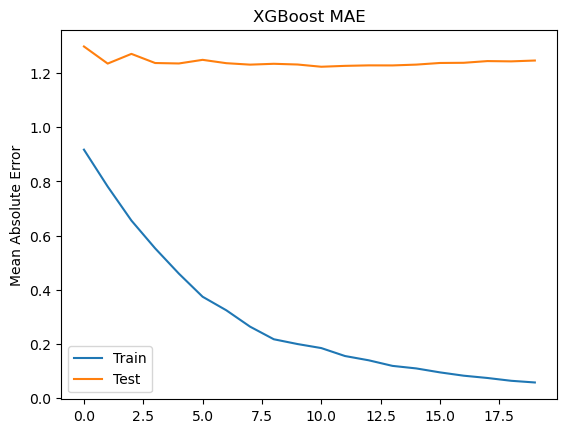

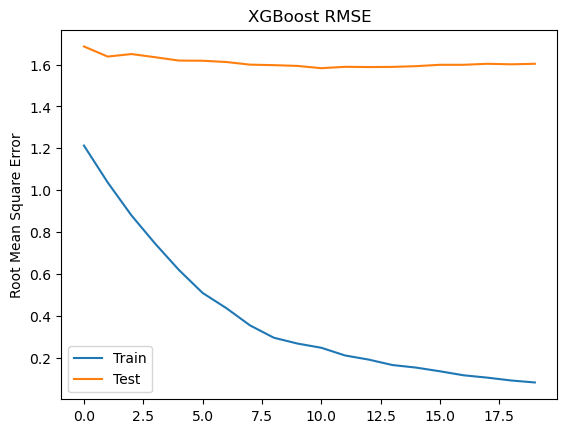

In [28]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
model = xgb.XGBRegressor(verbosity=0)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = model.evals_result()
epoch = len(results['validation_0']['mae'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('XGBoost MAE')
pyplot.savefig('XGBoost_MAE_raw.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('XGBoost RMSE')
pyplot.savefig('XGBoost_RMSE_raw.png')
pyplot.show()

In [29]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBRegressor

parameters = {'objective':['reg:squarederror'],
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.001,0.004,0.008,0.01,0.02,0.03,0.04,0.05,0.06,0.07,
                                0.08,0.09,0.1,0.2,0.4,0.6,0.8,1],
              'max_depth': range(1,100,10),
              'min_child_weight': range(5,100,5),
              'colsample_bytree': [0.1,0.2,0.4,0.8,1],
              'n_estimators': range(10,1000,10),
              "reg_alpha"   : [0.1,0.2,0.4,0.6,0.8,1],
              "reg_lambda"  : range(1,10,1),
              "gamma"       : range(1,10,1)}

xgb_model = XGBRegressor(random_state=30)

grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters, cv=5,n_iter=15,scoring='neg_mean_absolute_error',verbose=5,n_jobs=12)
grid_obj_xgb.fit(X_train, y_train,verbose = 1)

y_pred_train = grid_obj_xgb.predict(X_train)
y_pred_test = grid_obj_xgb.predict(X_test)

err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:    1.9s
[Parallel(n_jobs=12)]: Done  68 out of  75 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=12)]: Done  75 out of  75 | elapsed:    2.6s finished


In [30]:
print('\n All results:')
print(grid_obj_xgb.cv_results_)
print('\n Best estimator:')
print(grid_obj_xgb.best_estimator_)
print('\n Best hyperparameters:')
print(grid_obj_xgb.best_params_)
results = pd.DataFrame(grid_obj_xgb.cv_results_)#


 All results:
{'mean_fit_time': array([0.32413387, 0.32213869, 0.11987963, 0.01376348, 0.43574023,
       0.11888137, 0.11529179, 0.07579732, 0.15219722, 1.0134017 ,
       0.31884913, 0.25611525, 0.29082298, 0.01496024, 0.09853706]), 'std_fit_time': array([0.03384515, 0.00764764, 0.09420945, 0.00039926, 0.06018526,
       0.00596388, 0.0042594 , 0.00218523, 0.00439044, 0.06290895,
       0.01515948, 0.00317893, 0.01039477, 0.00063075, 0.00284879]), 'mean_score_time': array([0.0029922 , 0.00279274, 0.00219407, 0.00219402, 0.00259318,
       0.00279245, 0.00199456, 0.00219431, 0.00369306, 0.00159535,
       0.00239377, 0.00259328, 0.00239315, 0.00219393, 0.00239387]), 'std_score_time': array([3.50402318e-07, 1.59578324e-03, 3.99637237e-04, 3.98945876e-04,
       4.88636062e-04, 3.98921995e-04, 2.78041453e-07, 3.99041272e-04,
       1.53743916e-03, 4.86653533e-04, 4.88285730e-04, 4.88616597e-04,
       7.98213505e-04, 3.98874297e-04, 7.96902331e-04]), 'param_reg_lambda': masked_array(da

[0]	validation_0-mae:1.13967	validation_0-rmse:1.47439	validation_1-mae:1.30970	validation_1-rmse:1.68873
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-mae:1.12961	validation_0-rmse:1.46312	validation_1-mae:1.30475	validation_1-rmse:1.68283
[2]	validation_0-mae:1.12091	validation_0-rmse:1.45257	validation_1-mae:1.30051	validation_1-rmse:1.67810
[3]	validation_0-mae:1.11197	validation_0-rmse:1.44262	validation_1-mae:1.29683	validation_1-rmse:1.67323
[4]	validation_0-mae:1.10409	validation_0-rmse:1.43331	validation_1-mae:1.29403	validation_1-rmse:1.66935
[5]	validation_0-mae:1.09940	validation_0-rmse:1.42520	validation_1-mae:1.29143	validation_1-rmse:1.66312
[6]	validation_0-mae:1.09144	validation_0-rmse:1.41660	validation_1-mae:1.28881	validation_1-rmse:1.65923
[7]	validation_0-mae:1.08478	validation_0-rmse:1.40856	validation_1-mae:1.28622	validation_1-rmse:1

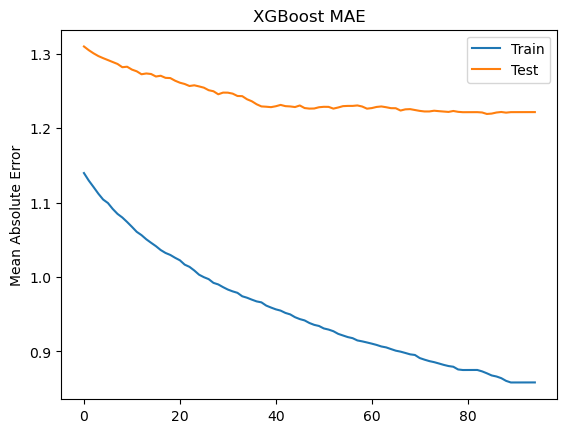

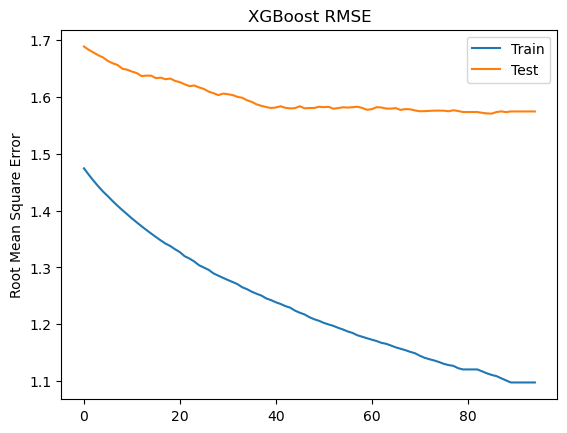

In [31]:
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=31,
             min_child_weight=40, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=30,
             reg_alpha=1, reg_lambda=3, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["mae", "rmse"], eval_set=eval_set, verbose=True, early_stopping_rounds=10)
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
predictions
results = model.evals_result()
epoch = len(results['validation_0']['mae'])
x_axis = range(0, epoch)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train')
ax.plot(x_axis, results['validation_1']['mae'], label='Test')
ax.legend()
pyplot.ylabel('Mean Absolute Error')
pyplot.title('XGBoost MAE')
pyplot.savefig('XGBoost_MAE_tuned.png')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('Root Mean Square Error')
pyplot.title('XGBoost RMSE')
pyplot.savefig('XGBoost_RMSE_tuned.png')
pyplot.show()

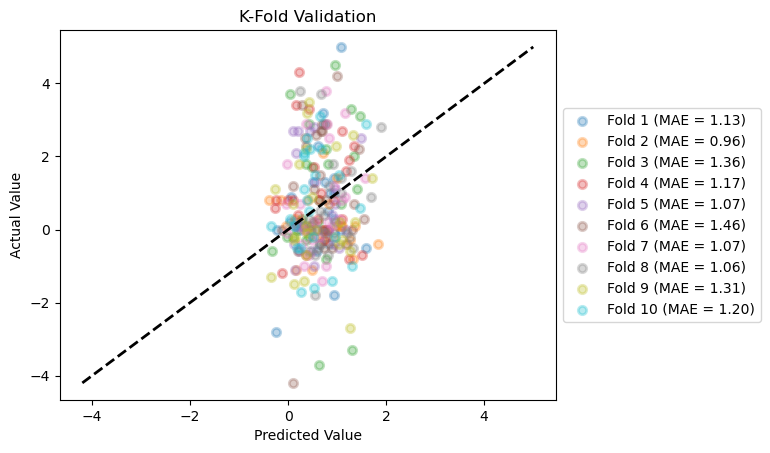

In [32]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

scores = []
cv = KFold(n_splits=10, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train.iloc[train],
                 y_train.iloc[train]).predict(X_train.iloc[test])
    true = y_train.iloc[test]
    score = mean_absolute_error(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3,
                label='Fold %d (MAE = %0.2f)' % (i,score))
    i = i+1
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)],
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.title('K-Fold Validation')
plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('K-fold_Validation_MAE.png')
plt.show()

In [33]:
from sklearn import metrics
## Kpi
print("R2 (explained variance):", round(metrics.r2_score(y_test, predictions), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predictions)/predictions)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.2f}".format(metrics.mean_absolute_error(y_test, predictions)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))
## residuals
residuals = []
for i, c in zip(y_test, y_pred):
    residuals.append(i - c)

R2 (explained variance): 0.11
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 2.66
Mean Absolute Error (Σ|y-pred|/n): 1.22
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 1.57


In [34]:
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test.iloc[max_idx], y_pred[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

Max Error: -5


In [35]:
print(y_test.iloc[20] - y_pred[20])

-4.46443794965744


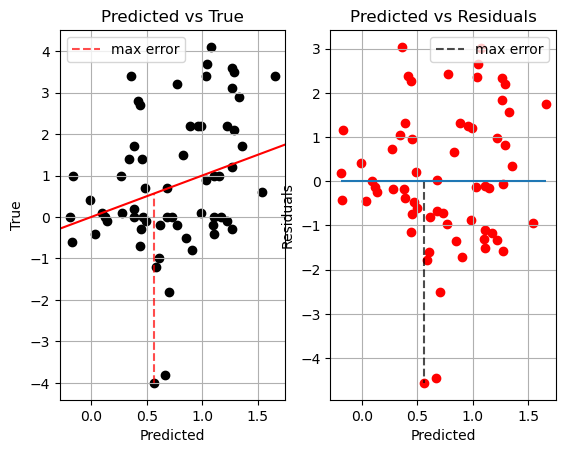

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2)
from statsmodels.graphics.api import abline_plot
ax[0].scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()

## Plot predicted vs residuals
ax[1].scatter(y_pred, residuals, color="red")
ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
ax[1].grid(True)
ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
ax[1].hlines(y=0, xmin=np.min(y_pred), xmax=np.max(y_pred))
ax[1].legend()
plt.savefig("residuals_fit.jpg")
plt.show()

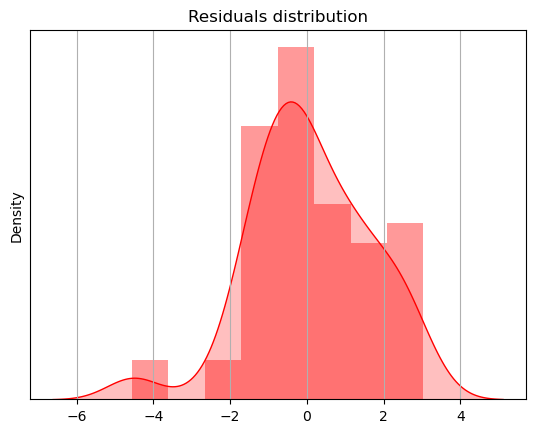

In [37]:
import seaborn as sns
fig, ax = plt.subplots()
sns.distplot(residuals, color="red", hist=True, kde=True, kde_kws={"shade":True}, ax=ax)
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.savefig('Residuals_distribution.png')
plt.show()


In [38]:
## Importance
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.04, max_delta_step=0, max_depth=31,
             min_child_weight=40, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=0, num_parallel_tree=1, random_state=30,
             reg_alpha=1, reg_lambda=3, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
import shap

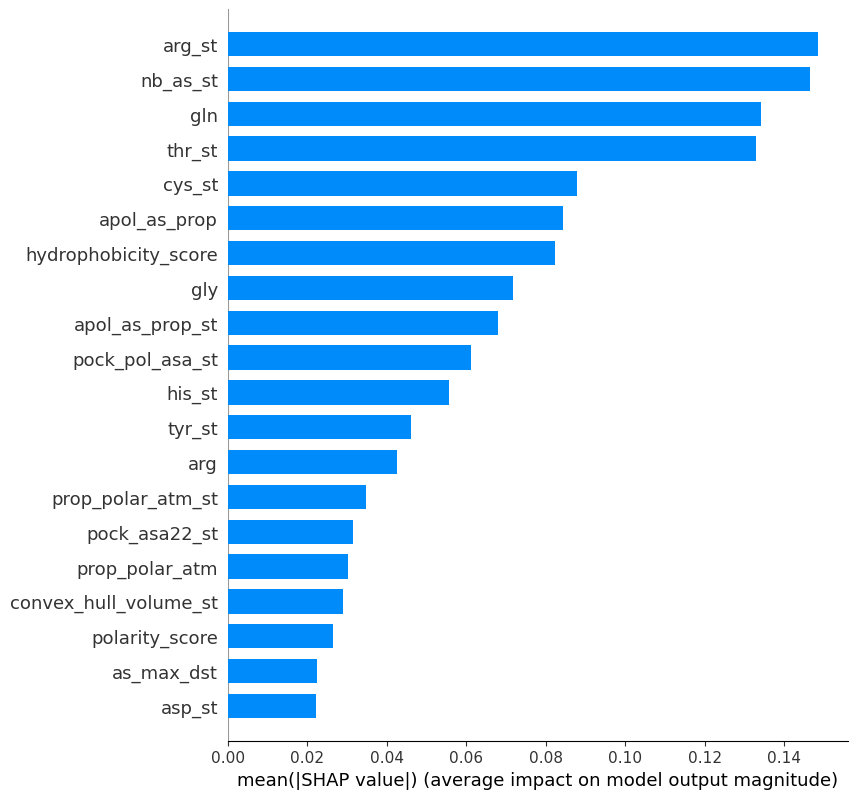

In [40]:
shap_values = shap.Explainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.savefig("summary_plot2.png")

<Figure size 640x480 with 0 Axes>

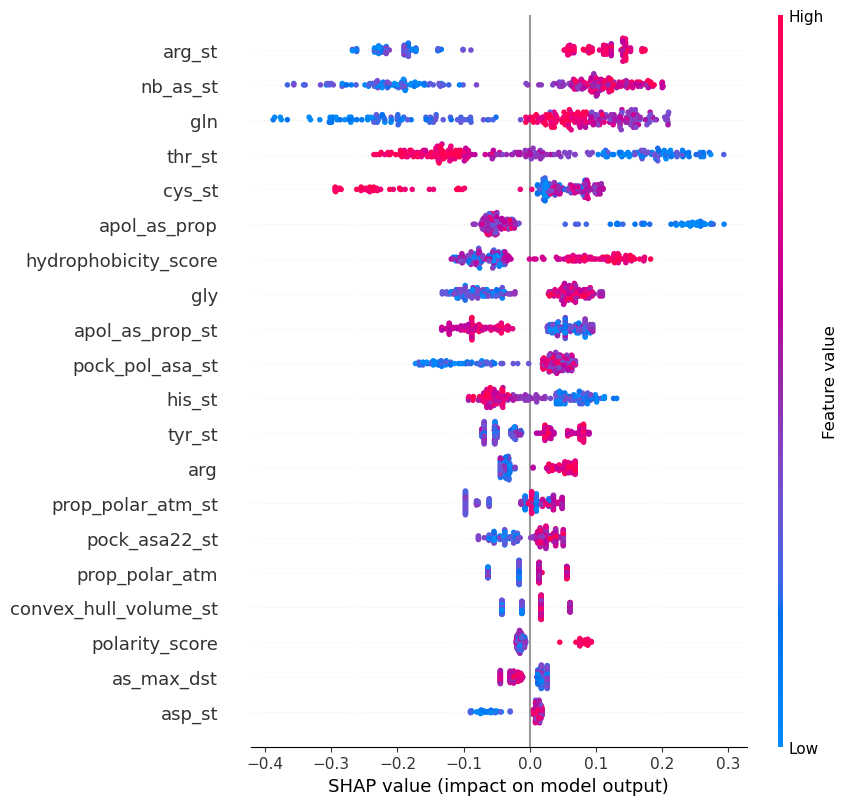

In [41]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
f.savefig("summary_plot1.png", bbox_inches='tight', dpi=600)

In [42]:
import lazypredict
print(lazypredict.__version__)

0.2.9


In [43]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

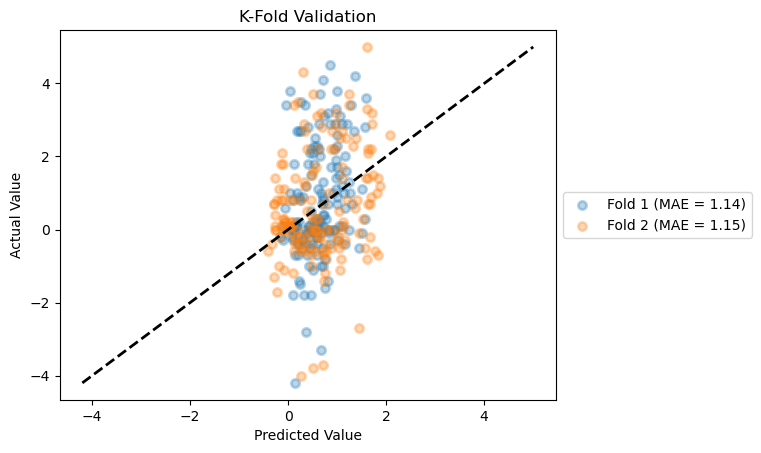

Average of CV: 1.1456219581266243
All Scores of CV [1.1432651629814734, 1.1479787532717751]


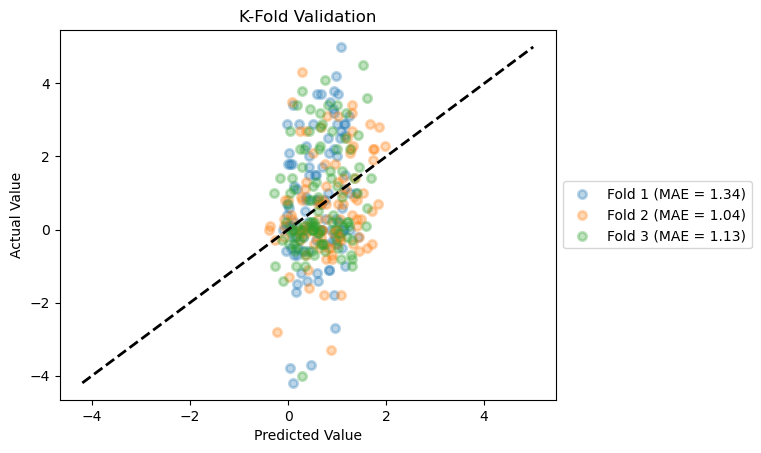

Average of CV: 1.1665483225805635
All Scores of CV [1.3368220411814173, 1.0356167702147594, 1.127206156345514]


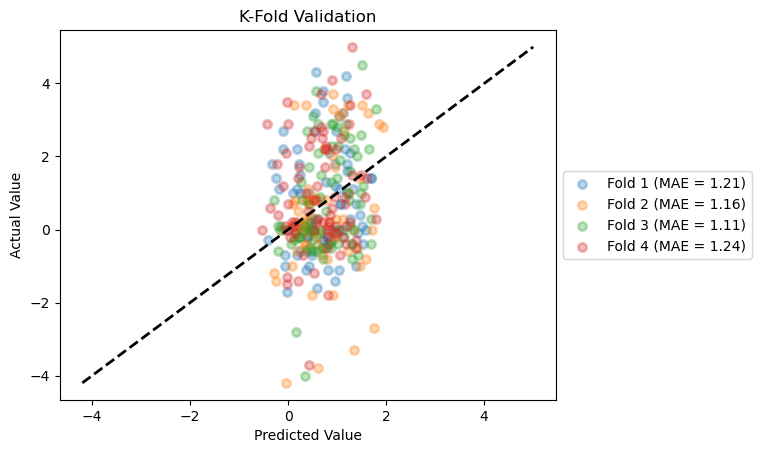

Average of CV: 1.1814035595036472
All Scores of CV [1.2128008563549093, 1.158847757562613, 1.1138225357501932, 1.2401430883468727]


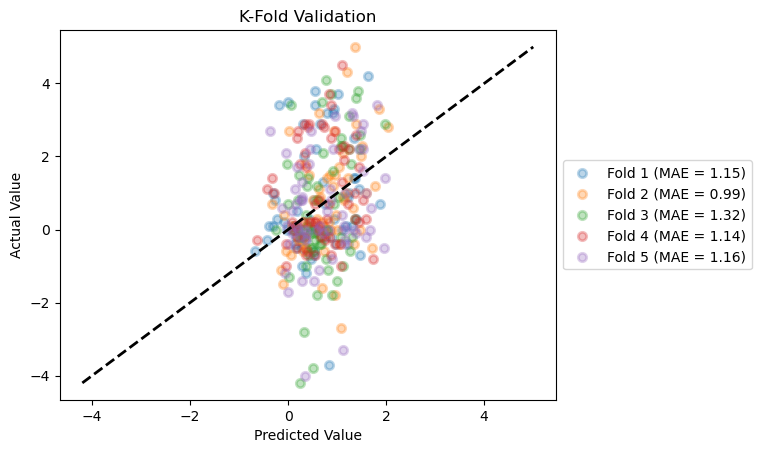

Average of CV: 1.154960267227
All Scores of CV [1.1533873543852853, 0.9918716830866677, 1.3236559558299283, 1.1408905914714262, 1.1649957513616933]


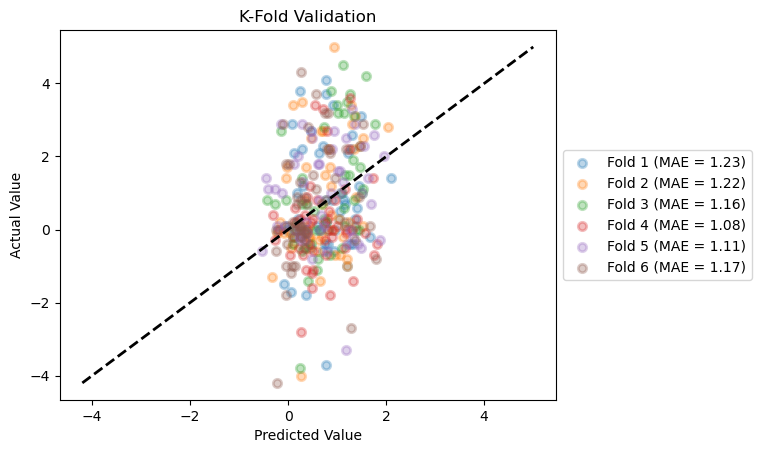

Average of CV: 1.1614063776838475
All Scores of CV [1.230487704735536, 1.2166851578996731, 1.1576076756303126, 1.0829485523012967, 1.113295112664883, 1.1674140628713827]


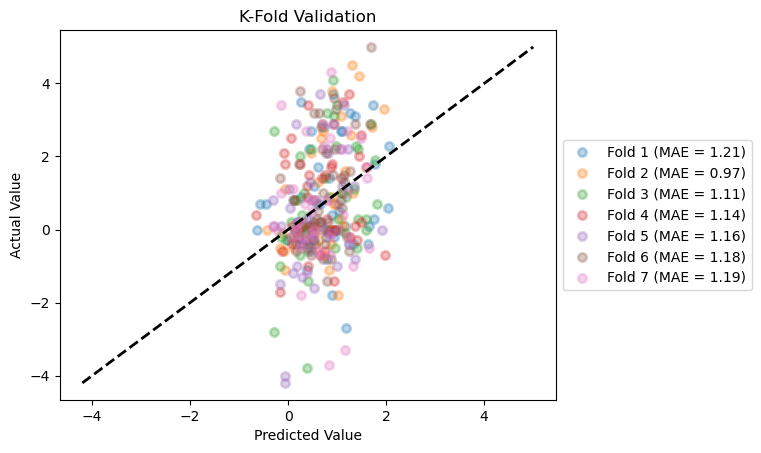

Average of CV: 1.1370093112470094
All Scores of CV [1.2087446777025856, 0.97440640423033, 1.1091478807396358, 1.1417495224210952, 1.1575394413687965, 1.1808182337067346, 1.1866590185598895]


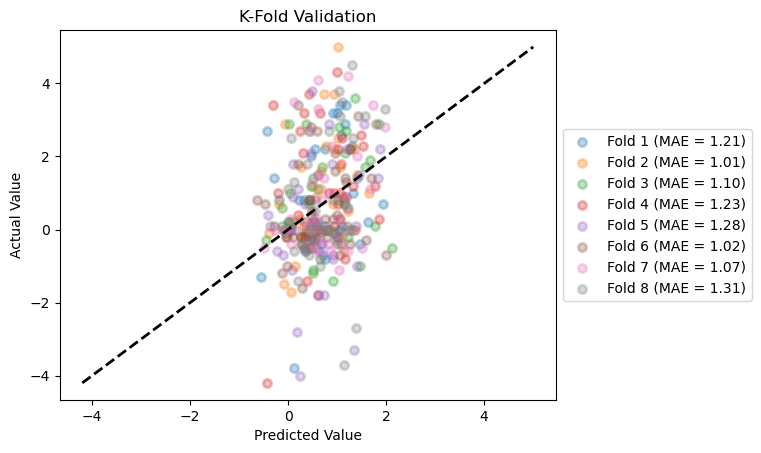

Average of CV: 1.1548511691391468
All Scores of CV [1.207480183167335, 1.0095984413073613, 1.10400626827509, 1.2347510747420483, 1.2812424789636563, 1.0232604596859372, 1.0659941526559682, 1.3124762943157784]


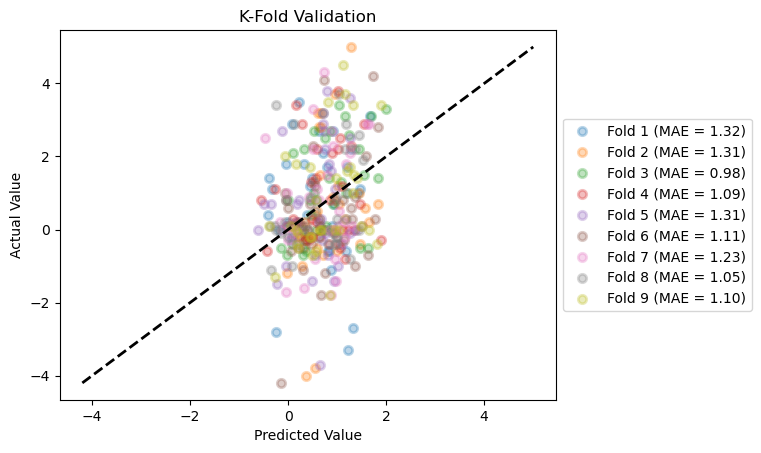

Average of CV: 1.1657339149218202
All Scores of CV [1.3179912218025753, 1.311504476581301, 0.977841101373945, 1.0920823628561838, 1.3053590290887016, 1.1067112898826599, 1.22836094761596, 1.0531008620472515, 1.098653943047804]


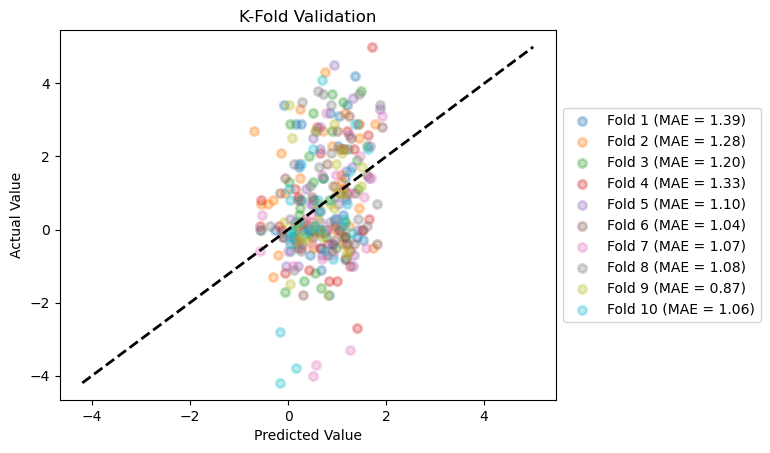

Average of CV: 1.1424504943648652
All Scores of CV [1.3918320212513207, 1.2824625212699174, 1.1987665305214543, 1.3269385445502497, 1.101590956411054, 1.0386459171772002, 1.0697304179591516, 1.083322508488932, 0.8688890526371618, 1.0623264733822118]


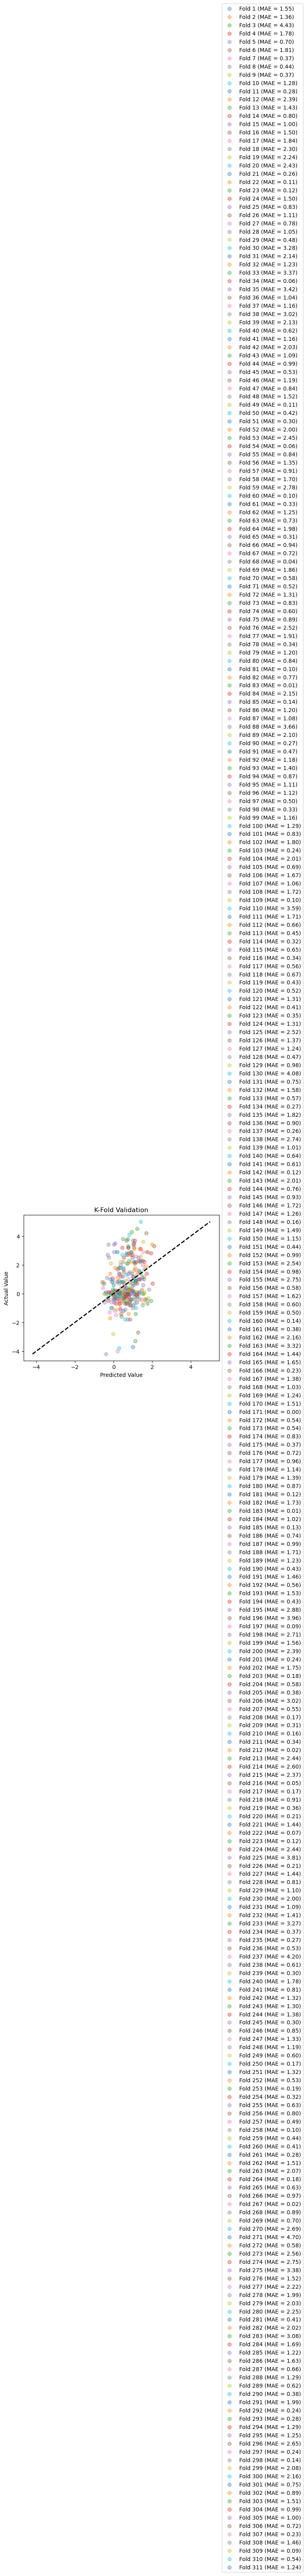

Average of CV: 1.1622939483912427
All Scores of CV [1.5538630485534668, 1.3631296515464784, 4.428680944442749, 1.776559168100357, 0.6996203541755677, 1.8050187587738038, 0.37242137193679814, 0.4387723207473755, 0.3685285329818726, 1.2820631980895996, 0.27901339530944824, 2.3882065057754516, 1.4311161994934083, 0.8020689189434052, 1.0039877891540527, 1.504938268661499, 1.8413857460021972, 2.3044647455215452, 2.2423484086990357, 2.431854021549225, 0.2628446936607361, 0.1062747716903687, 0.11583898067474363, 1.5029281795024871, 0.8274070143699646, 1.1115979194641112, 0.7759544432163239, 1.0458077907562258, 0.478058797121048, 3.2796476840972897, 2.1387618660926817, 1.2263662815093994, 3.374082255363464, 0.06023651361465454, 3.4188088178634644, 1.0431621074676514, 1.1564590096473695, 3.016311299800873, 2.1251410007476808, 0.6203093767166138, 1.1626448035240173, 2.025572967529297, 1.0885362863540649, 0.9876229643821717, 0.5278948366641998, 1.186293077468872, 0.8351121068000793, 1.52362878322

In [45]:
n_fold = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for fold in n_fold:
    scores = []
    cv = KFold(n_splits=fold, shuffle=True)
    fig = plt.figure()
    i = 1
    for train, test in cv.split(X, Y):
        prediction = model.fit(X.iloc[train],
                     Y.iloc[train]).predict(X.iloc[test])
        true = Y.iloc[test]
        score = mean_absolute_error(true, prediction)
        scores.append(score)
        plt.scatter(prediction, true, lw=2, alpha=0.3,
                    label='Fold %d (MAE = %0.2f)' % (i,score))
        i = i+1
    plt.plot([min(Y),max(Y)], [min(Y),max(Y)],
             linestyle='--', lw=2, color='black')
    plt.xlabel('Predicted Value')
    plt.ylabel('Actual Value')
    plt.title('K-Fold Validation')
    plt.legend(prop={"size":10}, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    print("Average of CV:", mean(scores))
    print("All Scores of CV", scores)